# Image processing example - multiple folders: nifti, erosion, dilation

- 수정일: 2020/04/08
- 사용문의: yhnam83@gmail.com


nifti util인 nibabel이 설치되어 있지 않은 경우 !pip install nibabel로 설치함. 나머지는 anaconda나 google colab.의 경우 기본적으로 설치되어 있을 것입니다.

In [1]:
!pip install nibabel

필수 패키지를 불러 옵니다. 설치되지 않은 패키지가 있으면 에러가 날 수 있습니다. 

In [0]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import skimage.morphology as mp

- Ne, Nd: erosion, dilation의 정도를 결정합니다. 하나의 파일만 프로세싱하는 코드에서 미리 세팅을 하고 가져오도록 합니다.
- path: 환자들의 폴더를 포함하고 있는 폴더 (절대경로로 처음부터 적어줍니다.)
  - 윈도우시스템의 예. C:/mydata/myproject1/  
  - 유닉스시스템(linux/osx)의 예. /Volumes/mynas/mydata/myproject1/
- imgname: image 파일 (예. T1.nii.gz)
- segname: binary segmentation 파일 (예. seg.nii.gz), binary가 아닌 경우도 binary로 간주함.
- segname_new: 새로 저장될 segmentation파일의 이름 (예. seg_new.nii.gz)


In [0]:
Ne = 3 # erosion의 정도를 결정
Nd = 9 # dilation의 정도를 결정

path = "/content/drive/My Drive/mary/jjy/radiomics/"
imgname = "T2.nii.gz"
segname = "seg2.nii.gz"
segname_new = "seg2new.nii.gz"

- 검색된 폴더들의 리스트가 출력됩니다. 확인 후 다음 cell을 진행합니다.

In [4]:
Input_folder = os.listdir(path)
patient_id = []
print("I found below folders:")
for i in range(0,len(Input_folder)):
  if os.path.isdir(path+Input_folder[i]):
    print(Input_folder[i])
    patient_id.append(Input_folder[i])

I found below folders:
p0001
p0002


- 아래의 loop를 실행하면 불러온 모든 폴더에 대한 프로세싱을 진행합니다. 
- 에러출력시에 폴더 안의 파일명이 동일한지, 존재하지 않는 파일이 있는지, 오타가 없는지 등 확인 필요.

patient id:  p0001
size of t2 image =  (448, 448, 35)
size of msk image =  (448, 448, 35)
slice # of largest mass: 18


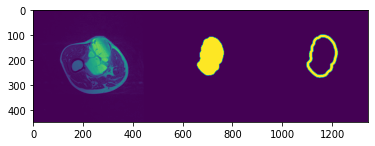

patient id:  p0002
size of t2 image =  (448, 448, 35)
size of msk image =  (448, 448, 35)
slice # of largest mass: 18


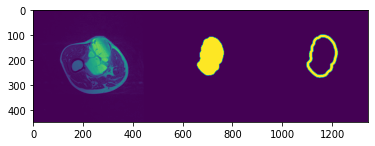

In [10]:
for i in range(0,len(patient_id)):
  print('patient id: ',patient_id[i])
  t2 = nib.load(path+patient_id[i]+'/'+imgname)
  msk = nib.load(path+patient_id[i]+'/'+segname)

  t2img = t2.get_fdata()
  print('size of t2 image = ',t2img.shape)
  mskimg = msk.get_fdata()
  print('size of msk image = ',mskimg.shape)
  zzz=np.sum(np.sum(mskimg,axis=1),axis=0);
  zmax=np.argmax(zzz)
  print('slice # of largest mass:',zmax)
  n_slice = zmax # slice number to be displayed

  mskimg2 = mskimg>0.5
  mskimg2e = np.zeros(mskimg.shape)
  mskimg2d = np.zeros(mskimg.shape)
  NX,NY,NZ=mskimg.shape
  NZ
  # for 2d erosion/dilation (for conventional 2D MR images)
  for nz in range(NZ):
    mskimg2e[:,:,nz] = mp.binary_erosion(mskimg2[:,:,nz],selem=mp.disk(Ne))
    mskimg2d[:,:,nz] = mp.binary_dilation(mskimg2[:,:,nz],selem=mp.disk(Nd))

  # for 3d erosion/dilation (for 3D MR images, not recommended for 2D data with thick slice)
  # mskimg2e=mp.binary_erosion(mskimg2,selem=mp.disk(Ne))
  # mskimg2d=mp.binary_dilation(mskimg2,selem=mp.disk(Nd))

  mskimg_new = ((mskimg2d.astype(int)-mskimg2e.astype(int))>0.5).astype(int)
  msk_new=nib.Nifti1Image(mskimg_new,msk.affine,msk.header)
  nib.save(msk_new,path+patient_id[i]+'/'+segname_new)
  plt.imshow(np.concatenate((t2img[:,:,n_slice],3000*mskimg[:,:,n_slice],3000*mskimg_new[:,:,n_slice]),axis=1))
  plt.show()